Image Preprocessing

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = "../datagenerator/images"

In [3]:
images = []
labels = [] ## {0 -> drink, 1 -> phone, 2 -> safe}

In [4]:
index = 0

for item in os.listdir(data_path):
    for file in os.listdir(data_path + "/" + item):
        image = cv2.imread(data_path + "/" + item + "/" + file)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        images.append(image)
        labels.append(index)
        
    index += 1

In [5]:
image.shape

(400, 400)

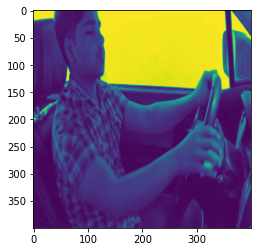

In [6]:
plt.imshow(np.asarray(image))

In [9]:
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

x_train, x_test = np.asarray(x_train), np.asarray(x_test)
y_train, y_test = to_categorical(y_train, num_classes=3), keras.utils.to_categorical(y_test, num_classes=3)


In [10]:
x_train, x_test = np.expand_dims(x_train, axis = 3), np.expand_dims(x_test, axis=3)

In [11]:
x_train.shape, x_test.shape

((2402, 400, 400, 1), (601, 400, 400, 1))

In [14]:
y_train[1500]

array([1., 0., 0.], dtype=float32)

In [ ]:
np.savez_compressed("../imageprocessing/data/xtrain.npz", x_train)

In [70]:
np.savez_compressed("../imageprocessing/data/x_test.npz", x_test)

In [71]:
np.savez_compressed("../imageprocessing/data/y_train.npz", y_train)

In [73]:
np.savez_compressed("../imageprocessing/data/y_test.npz", y_test)